# Final Project CS418

_This file contains the jupyter notebook entailing the application of the data scicence project._
_Link to the ppt for the project:<https://docs.google.com/presentation/d/1ZkmopeDAhzznFytpMSVt_lVI8DvZVrbsTyGKRQ1yg-c/edit#slide=id.g2bc228a8286_0_0>_
_Link to github: https://github.com/uic-cs418/Mamba-Mentality_

Project Introduction:

We will be analyzing correlations between two datasets, namely COVID vaccinations that surround the crux of the epidemic as well as the frequency of other viruses that occured during this time frame. Information will be extrapolated from 2020 to 2023 in the United States.

Information will be analyzed by end of week increments citing this consistency in both data sets for more granularity in observations. Coarser data will be extracted on an annual level.

For those afflicated with COVID, we will make observations in regards how ethnic denominations may be affected by the epidemic as well as population density. Are certain groups more susceptible?

Is there correlations between vaccination rates and pathogen spread, and beyond Covid-19, has there been any effect on those afflicted by other respiratoy illnesses?

Additionally, how effective has bivalent vaccinations performed in diseased populations? This can be observed concurrently with COVID and disjointly.





Any changes:

The temporal observations have remained consistent, noting the seasonal distributions and changes in bivalent vaccinations and other vacinations. Furthermore, investigations on ethnic demographics will be a significant part of data analysis in regards to observing those afflicted with disease.

Our comparative analysis will provide more data on how vaccinations that occur in parallel with the existence of other diseases changes over a bounded timeset. The specific demographic analysis will be more centralized on its relation to COVID vaccinations which remains consistent with the intial intended procedure.



## Importing libraries


In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import csv


### Importing Data


In [102]:
df = pd.read_csv("../data/Influenza__COVID-19__RSV__and_Other_Respiratory_Virus_Laboratory_Surveillance.csv", na_filter=False)
df.head()

,mmwr_week,week,week_start,week_end,season,pathogen,lab_tot_tested,lab_tot_positive,lab_pct_positive,lab_tot_tested_cumulative,lab_tot_positive_cumulative,lab_pct_positive_cumulative,current_week_ending,row_id
0,201040,40,10/03/2010,10/09/2010,2010-2011,Influenza,129,0,0,129,0,0.00,10/07/2023,201040-Influenza
1,201041,41,10/10/2010,10/16/2010,2010-2011,Influenza,133,0,0,262,0,0.00,10/14/2023,201041-Influenza
2,201042,42,10/17/2010,10/23/2010,2010-2011,Influenza,144,0,0,406,0,0.00,10/21/2023,201042-Influenza
3,201043,43,10/24/2010,10/30/2010,2010-2011,Influenza,135,0,0,541,0,0.00,10/28/2023,201043-Influenza
4,201044,44,10/31/2010,11/06/2010,2010-2011,Influenza,150,1,0.0066666667,691,1,0.00,11/04/2023,201044-Influenza


## Step 1: Cleaning Data

In [103]:
df.groupby('season')
df.head()

,mmwr_week,week,week_start,week_end,season,pathogen,lab_tot_tested,lab_tot_positive,lab_pct_positive,lab_tot_tested_cumulative,lab_tot_positive_cumulative,lab_pct_positive_cumulative,current_week_ending,row_id
0,201040,40,10/03/2010,10/09/2010,2010-2011,Influenza,129,0,0,129,0,0.00,10/07/2023,201040-Influenza
1,201041,41,10/10/2010,10/16/2010,2010-2011,Influenza,133,0,0,262,0,0.00,10/14/2023,201041-Influenza
2,201042,42,10/17/2010,10/23/2010,2010-2011,Influenza,144,0,0,406,0,0.00,10/21/2023,201042-Influenza
3,201043,43,10/24/2010,10/30/2010,2010-2011,Influenza,135,0,0,541,0,0.00,10/28/2023,201043-Influenza
4,201044,44,10/31/2010,11/06/2010,2010-2011,Influenza,150,1,0.0066666667,691,1,0.00,11/04/2023,201044-Influenza


In [104]:
df_covid_era = df[df['season'] > '2018-2019']
df_covid_era.head()

,mmwr_week,week,week_start,week_end,season,pathogen,lab_tot_tested,lab_tot_positive,lab_pct_positive,lab_tot_tested_cumulative,lab_tot_positive_cumulative,lab_pct_positive_cumulative,current_week_ending,row_id
468,201940,40,09/29/2019,10/05/2019,2019-2020,Adenovirus,148,2,0.0135135135,148,2,0.01,10/07/2023,201940-Adenovirus
469,201940,40,09/29/2019,10/05/2019,2019-2020,Human Metapneumovirus,152,1,0.0065789474,152,1,0.01,10/07/2023,201940-Human Metapneumovirus
470,201940,40,09/29/2019,10/05/2019,2019-2020,Influenza,653,5,0.0076569678,653,5,0.01,10/07/2023,201940-Influenza
471,201940,40,09/29/2019,10/05/2019,2019-2020,Parainfluenza,152,8,0.0526315789,152,8,0.05,10/07/2023,201940-Parainfluenza
472,201940,40,09/29/2019,10/05/2019,2019-2020,RSV,152,0,0,152,0,0.00,10/07/2023,201940-RSV


## Exploratory data analysis(EDA):

_Make a copy of the df before starting. Do this in the format yourname_new_df = df_covid_era.copy()._

### Talha's EDA:(Short description of what we are expecting and the relation ship of variables used in the visualization)

In [105]:
"""
EDA code will go in this block

"""

'\nEDA code will go in this block\n\n'

##### Things learned and outcome from the EDA and analysis of visualization go here:

In [106]:
import pandas as pd

#OBESITY BLOCK

# Load dataframe2 from the CSV file
df2 = pd.read_csv(r"..\data\Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System (1).csv")

# Convert any columns containing year information to datetime type
# For example, if there's a column named 'YearStart'
df2['YearStart'] = pd.to_datetime(df2['YearStart'], format='%Y')

# Filter dataframe2 to include only rows with data from 2018 and above
df2_filtered = df2[df2['YearStart'].dt.year >= 2019]
df2_filtered['YearStart'] = pd.to_datetime(df2_filtered['YearStart']).dt.year
df2_fs = df2_filtered.sort_values(by='YearStart', ascending=True)
#df2_filtered['YearStart'] = pd.to_datetime(df2_filtered['YearStart']).dt.year

df2_fs.dropna(subset=['Race/Ethnicity'], inplace=True)
df2_fs = df2_fs[['YearStart','YearEnd','Race/Ethnicity','Sample_Size']]


df2_fs['Race/Ethnicity'] = df2_fs['Race/Ethnicity'].replace({
    'Non-Hispanic Black': '"Black, non-Latinx"',
    'Non-Hispanic White': '"White, non-Latinx"',
    'Hispanic': 'Latinx',
    'Asian': '"Asian, non-Latinx"',
    '2 or more races': '"Other, non-Latinx"',
    'Other': '"Other, non-Latinx"',
    'American Indian/Alaska Native': '"Other, non-Latinx"',
    'Hawaiian/Pacific Islander': '"Other, non-Latinx"'
})



#df2_fs.to_csv("obesity2.csv", index=False)
df2_fs['Race/Ethnicity'] = df2_fs['Race/Ethnicity'].str.replace('"', '')
df2_fs.to_csv('obesity2.csv', index=False, quoting=csv.QUOTE_ALL)

# Display the first few rows of the filtered dataframe
print(df2_fs.head())
print("Size of the DataFrame:", df2_fs.shape)


       YearStart  YearEnd     Race/Ethnicity  Sample_Size
42749       2019     2019  Other, non-Latinx          NaN
42754       2019     2019  Other, non-Latinx        113.0
42756       2019     2019  Asian, non-Latinx        247.0
42757       2019     2019  White, non-Latinx      11188.0
42761       2019     2019  White, non-Latinx       7943.0
Size of the DataFrame: (8632, 4)


C:\Users\Daniyal\AppData\Local\Temp\ipykernel_13228\3090500895.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_filtered['YearStart'] = pd.to_datetime(df2_filtered['YearStart']).dt.year


In [107]:
# Extracting the year from the 'Week End' column
vaccineO_df = pd.read_csv("..\data\COVID-19_Vaccinations_by_Age_and_Race-Ethnicity_-_Historical.csv")

vaccineO_df.replace('', pd.NA, inplace=True)
vaccineO_df = vaccineO_df.dropna(subset=['Week End'])

#NaN
vaccineO_df.fillna(0, inplace=True)
numeric_columns = ['Population Size', '1st Dose', 'Vaccine Series Completed', 'Boosted', 'Bivalent']
vaccineO_df[numeric_columns] = vaccineO_df[numeric_columns].apply(pd.to_numeric)


vaccineO_df['Week End'] = pd.to_datetime(vaccineO_df['Week End'])
vaccineO_df['Year'] = vaccineO_df['Week End'].dt.year
vaccineO_df = vaccineO_df[vaccineO_df['Year'] <= 2022]


# Grouping by 'Year' and 'Race/Ethnicity', and aggregating the columns
grouped_df = vaccineO_df.groupby(['Year', 'Race/Ethnicity']).agg({
    'Population Size': 'sum',
    '1st Dose': 'sum',
    '1st Dose Percent': 'mean',
    'Vaccine Series Completed': 'sum',
    'Vaccine Series Completed Percent': 'mean', 
    'Boosted': 'sum',
    'Boosted Percent': 'mean', 
    'Bivalent': 'sum',
    'Bivalent Percent': 'mean'  
}).reset_index()

# Optionally, you can rename the columns for clarity
grouped_df.columns = ['Year', 'Race/Ethnicity', 'Total Population', 'Total 1st Dose', 'Average 1st Dose Percent',
                      'Total Vaccine Series Completed', 'Average Vaccine Series Completed Percent', 'Total Boosted',
                      'Average Boosted Percent', 'Total Bivalent', 'Average Bivalent Percent']

grouped_df.to_csv('vaccine_Demographics.csv', index=False)

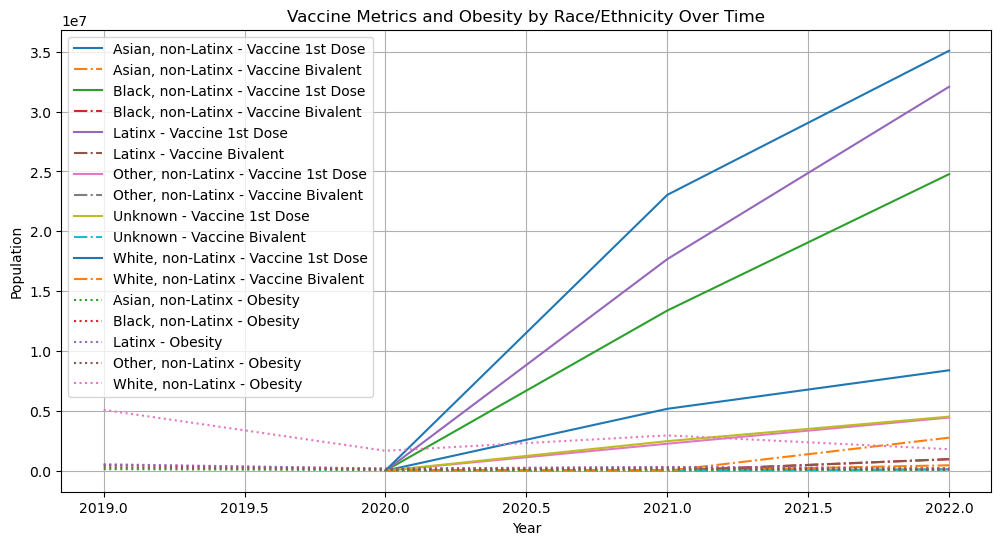

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

vaccine_df = grouped_df
obesity_df = df2_fs

df_obesity = obesity_df
df_vaccine = vaccine_df
df_vaccine = df_vaccine[df_vaccine['Race/Ethnicity'] != 'All']
# Filter relevant columns for vaccine data
vaccine_cols = ['Year', 'Race/Ethnicity', 'Total Population', 'Total 1st Dose', 'Total Bivalent']
df_vaccine = df_vaccine[vaccine_cols]

# Filter relevant columns for obesity data
obesity_cols = ['YearStart', 'Race/Ethnicity', 'Sample_Size']
df_obesity = df_obesity[obesity_cols]

# Rename columns in obesity dataframe to match vaccine dataframe
df_obesity = df_obesity.rename(columns={'YearStart': 'Year'})

# Group vaccine data by year and ethnicity and sum the values
df_vaccine_grouped = df_vaccine.groupby(['Year', 'Race/Ethnicity']).sum().reset_index()

# Group obesity data by year and ethnicity and sum the values
df_obesity_grouped = df_obesity.groupby(['Year', 'Race/Ethnicity']).sum().reset_index()
plt.figure(figsize=(12, 6))

for ethnicity in df_vaccine_grouped['Race/Ethnicity'].unique():
    df_vaccine_ethnicity = df_vaccine_grouped[df_vaccine_grouped['Race/Ethnicity'] == ethnicity]
    plt.plot(df_vaccine_ethnicity['Year'], df_vaccine_ethnicity['Total 1st Dose'], label=f'{ethnicity} - Vaccine 1st Dose', linestyle='-')
    
    # Plotting bivalent if available
    if 'Total Bivalent' in df_vaccine_grouped.columns:
        plt.plot(df_vaccine_ethnicity['Year'], df_vaccine_ethnicity['Total Bivalent'], linestyle='-.', label=f'{ethnicity} - Vaccine Bivalent')

for ethnicity in df_obesity_grouped['Race/Ethnicity'].unique():
    df_obesity_ethnicity = df_obesity_grouped[df_obesity_grouped['Race/Ethnicity'] == ethnicity]
    plt.plot(df_obesity_ethnicity['Year'], df_obesity_ethnicity['Sample_Size'], label=f'{ethnicity} - Obesity', linestyle=':')

plt.title('Vaccine Metrics and Obesity by Race/Ethnicity Over Time')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

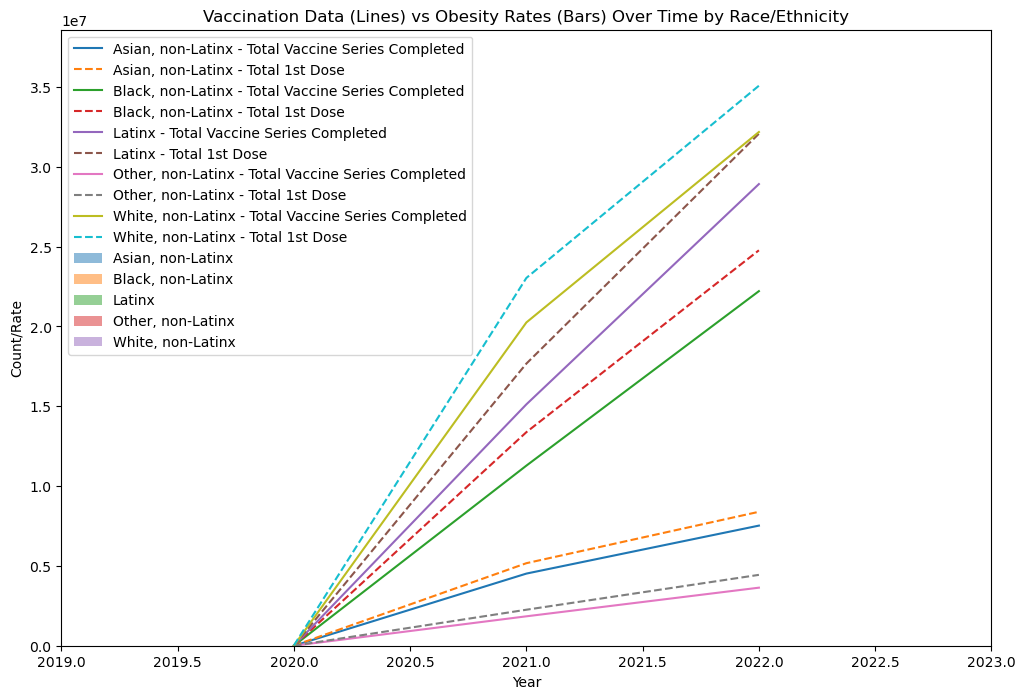

In [110]:
vaccine_df = grouped_df
obesity_df = df2_fs

# Convert the "Year" column in vaccine_df to datetime and extract the year
vaccine_df['Year'] = pd.to_datetime(vaccine_df['Year'], format='%Y').dt.year

# Select only relevant columns from the vaccination dataset, excluding 'Unknown' and 'All'
vaccine_selected = vaccine_df[(vaccine_df['Race/Ethnicity'] != 'Unknown') & (vaccine_df['Race/Ethnicity'] != 'All')][['Year', 'Race/Ethnicity', 'Total Vaccine Series Completed', 'Total 1st Dose']]

# Group vaccination data by year and race/ethnicity and calculate the mean
vaccine_grouped = vaccine_selected.groupby(['Year', 'Race/Ethnicity']).mean().reset_index()

# Extract the year from the "YearStart" column in the obesity dataset
obesity_df['Year'] = pd.to_datetime(obesity_df['YearStart']).dt.year

obesity_selected = obesity_df[['Year', 'Race/Ethnicity', 'Sample_Size']]
obesity_grouped = obesity_selected.groupby(['Year', 'Race/Ethnicity']).mean().reset_index()

# Plot vaccination data as lines over time
plt.figure(figsize=(12, 8))
for race, data in vaccine_grouped.groupby('Race/Ethnicity'):
    plt.plot(data['Year'], data['Total Vaccine Series Completed'], label=f'{race} - Total Vaccine Series Completed', linestyle='-')
    plt.plot(data['Year'], data['Total 1st Dose'], label=f'{race} - Total 1st Dose', linestyle='--')


for race, data in obesity_grouped.groupby('Race/Ethnicity'):
    plt.bar(data['Year'], data['Sample_Size'], label=race, alpha=0.5)  # Adjust alpha for transparency


plt.xlim(2019, 2023)


plt.ylim(0, max(vaccine_grouped[['Total Vaccine Series Completed', 'Total 1st Dose']].max().max(), obesity_grouped['Sample_Size'].max()) * 1.1)


plt.legend()
plt.xlabel('Year')
plt.ylabel('Count/Rate')
plt.title('Vaccination Data (Lines) vs Obesity Rates (Bars) Over Time by Race/Ethnicity')

# Show plot
plt.show()